# Discover your Poppy Torso

This notebook will guide you in your very first steps with Poppy Torso in Python. 

What you will see in this notebook:

1. Instantiate your robot
2. Access motors, send motor commands
3. Start high level behaviors

*We assume here that you are connected to a physical Poppy Torso. It also need to be assembled and configured (you can referer to the [documentation](http://docs.poppy-project.org/en) if you haven't done in yet).*
<img  src="images/poppy_torso.jpg"  width="500"/>

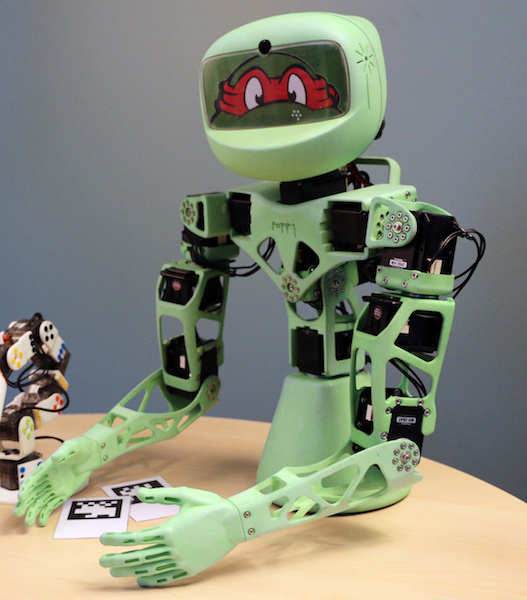

In [ ]:
# Import some matplolib shortcuts for Jupyter notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


## Instantiate your robot

To start using your robot in Python, you first need to instantiate it. You can do that by running the following code:

In [ ]:
from pypot.creatures import PoppyTorso

poppy = PoppyTorso()

**If you are using V-REP simulator**, you have to run this code instead. If you have troubles, look at the [documentation to install and run V-REP](http://docs.poppy-project.org/en/installation/install-vrep.html#test-your-installation).

In [ ]:
from pypot.creatures import PoppyTorso

poppy = PoppyTorso(simulator='vrep')

This creates a [Robot](http://poppy-project.github.io/pypot/pypot.robot.html#pypot.robot.robot.Robot) object that can be used to access the motors and sensors. It handles all the low-level communication for you, so you do not need to know anything about the serial protocol used to make a motor turn. The *motors* and *sensors* fields of the Robot are automatically synced to match the state of their hardware equivalent.

Before doing anything else, we will initalize everything by asking the robot to go to its init position (the code below will be described in more detailed later):

In [ ]:
poppy.init_position.start()

## Access motors

In a Poppy Torso, the motor are defined as illustrated below:

<img  src="images/poppy_torso_motors.png" width="500"/>

From the [Robot](http://poppy-project.github.io/pypot/pypot.robot.html#pypot.robot.robot.Robot) object, you can directly retrieve the list of motors connected:

In [ ]:
poppy.motors

As you can see *poppy.motors* holds a list of all motors.

You can retrieve all motors names:

In [ ]:
for m in poppy.motors:
    print(m.name)

 Each of them can be access directly from its name. For instance:
 
 

In [ ]:
poppy.l_elbow_y

### Read values from the motors

From the motor object you can access its registers. The main ones are:

* **present_position**: the current position of the motor in degrees
* **present_speed**: the current speed of the motor in degrees per second 
* **present_load**: the current workload of the motor (in percentage of max load)
* **present_temperature**: the temperature of the motor in celsius
* **angle_limit**: the reachable limits of the motor (in degrees)

They can be accessed directly:

In [ ]:
poppy.l_elbow_y.present_temperature

Or, to get the present position for all motors:

In [ ]:
[m.present_position for m in poppy.motors]

It's important to understand the *poppy.m1.present_position* is automatically updated with the real motor position (at 50Hz). Similarly for other registers, the update frequency may vary depending on its importance. For instance, the temperature is only refreshed at 1Hz as it is not fluctuating that quickly.

### Send motor commands

On top of the registers presented above, they are additional ones used to send commands. For instance, the position of the motor is split in two different registers: 

* the read-only **present_position** of the motor
* the read-write **goal_position** which sends to the motor a target position that it will try to reach.

If you want to set a new position for a motor, you write:

In [ ]:
poppy.l_arm_z.goal_position = 20

You should see the robot turn of 20 degrees. Sending motor command is as simple as that. To make it turn to the other side:

In [ ]:
poppy.l_arm_z.goal_position = -20

In the examples above, the motor turned as fast as possible (its default mode). You can change its *moving_speed* (i.e. its maximum possible speed):

In [ ]:
poppy.l_arm_z.moving_speed = 50

Now the motor *l_arm_z* can not move faster than 50 degrees per second. If we ask to move again, you should see the difference:

In [ ]:
poppy.l_arm_z.goal_position = 90

The main write registers are:

* **goal_position**: target position in degrees
* **moving_speed**: maximum reachable speed in degrees per second
* **compliant** (explained below) 

The dynamixel servo motors have two modes:

* **stiff**: the normal mode for motors where they can be controlled
* **compliant**: a mode where the motors can be freely moved by hand. This is particularly useful for phyisical human-robot interaction

You can make them switch from one mode to the other using the *compliant* register. For instance, you can turn the motor *m6* compliant via:

In [ ]:
poppy.l_arm_z.compliant = True

You should now be able to move this motors by hand. This is particularly useful for programming your robot by demonstration (see the dedicated notebook).

 And to turn it stiff again:

In [ ]:
poppy.l_arm_z.compliant = False

## High level behaviors

The Poppy Torso robot comes with a set of pre-defined behaviors. They can be specific postures - such as the init_position used at the beginning - or a *breathing* motion, ... 

You can find the exhaustive list using the *primitives* accessor:

In [ ]:
[p.name for p in poppy.primitives]

Those behaviors (or primitives in "poppy terms") can be started, stopped, paused, etc...

In [ ]:
poppy.upper_body_idle_motion.start()

You can make the Poppy Torso *breathe* for 10 seconds:

In [ ]:
import time

poppy.upper_body_idle_motion.start()
time.sleep(10)
poppy.upper_body_idle_motion.stop()

## Going further

Now that you have learnt the basis of what you can do with a Poppy Torso, there is much more to discover:
* how to record/replay move by demonstration
* how to define your own high-level behavior (e.g. a visual servoing of the tip of the robot using blob detection)
* used your Poppy Ergo Jr as a connected device and make it communaticate with the rest of the world using HTTP requests
* ...

You can find other examples in the [docs](http://docs.poppy-project.org) or in the notebook folder next to this one.